### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [2]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [3]:
N = 10000
diff_coff = np.zeros(N)
for i in range(N):
    bootstrap = sample_data.sample(replace=True, n=200)
    bootstrap_coff = bootstrap[bootstrap['drinks_coffee']==True]['height'].mean()
    bootstrap_non_coff = bootstrap[bootstrap['drinks_coffee']==False]['height'].mean()
    diff_coff[i] = bootstrap_coff - bootstrap_non_coff

In [4]:
np.percentile(diff_coff, 0.5),np.percentile(diff_coff, 99.5)

(0.10258900080919674, 2.5388333707966284)

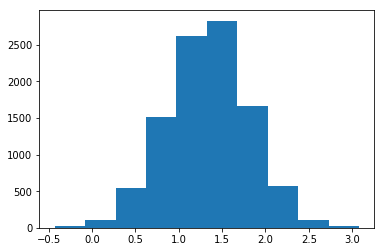

In [5]:
plt.hist(diff_coff);

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [6]:
N = 10000
diff_age = np.zeros(N)
for i in range(N):
    bootstrap = sample_data.sample(replace=True, n=200)
    bootstrap_old = bootstrap[bootstrap['age']=='>=21']['height'].mean()
    bootstrap_young = bootstrap[bootstrap['age']=='<21']['height'].mean()
    diff_age[i] = bootstrap_old - bootstrap_young

In [7]:
np.percentile(diff_age, 0.5),np.percentile(diff_age, 99.5)

(3.3652749452554089, 5.0932450670660936)

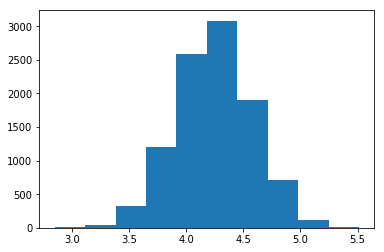

In [8]:
plt.hist(diff_age);

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [9]:
N = 10000
diff_u21 = np.zeros(N)
for i in range(N):
    bootstrap = sample_data[sample_data['age']=='<21'].sample(replace=True, n=200)
    bootstrap_coff_u21 = bootstrap[bootstrap['drinks_coffee']==True]['height'].mean()
    bootstrap_non_coff_u21 = bootstrap[bootstrap['drinks_coffee']==False]['height'].mean()
    diff_u21[i] = bootstrap_coff_u21 - bootstrap_non_coff_u21

In [10]:
np.percentile(diff_u21, 2.5),np.percentile(diff_u21, 97.5)

(-2.3669305645323724, -1.3204047900572433)

(array([   41.,   247.,   932.,  1992.,  2713.,  2394.,  1188.,   395.,
           89.,     9.]),
 array([-2.73549625, -2.54544629, -2.35539633, -2.16534637, -1.97529641,
        -1.78524645, -1.59519649, -1.40514654, -1.21509658, -1.02504662,
        -0.83499666]),
 <a list of 10 Patch objects>)

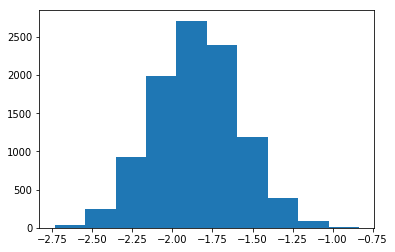

In [11]:
plt.hist(diff_u21);

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [12]:
N = 10000
diff_o21 = np.zeros(N)
for i in range(N):
    bootstrap = sample_data[sample_data['age']=='>=21'].sample(replace=True, n=200)
    bootstrap_coff_o21 = bootstrap[bootstrap['drinks_coffee']==True]['height'].mean()
    bootstrap_non_coff_o21 = bootstrap[bootstrap['drinks_coffee']==False]['height'].mean()
    diff_o21[i] = bootstrap_coff_o21 - bootstrap_non_coff_o21

In [13]:
np.percentile(diff_o21, 2.5),np.percentile(diff_o21, 97.5)

(-4.0136348943494768, -2.1878423190579683)

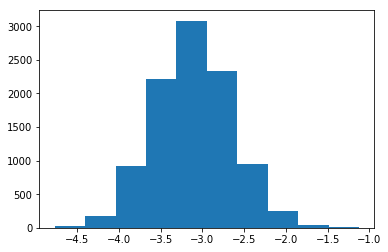

In [14]:
plt.hist(diff_o21);